In [18]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트, 마이너스 
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 패션 MNIST 데이터 로드

In [19]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [20]:
(train_input,train_target),(test_input,test_target) = load_data()

정규화

In [21]:
train_scaled = train_input / 255.0 # 0~1 실수값 변경

In [22]:
train_scaled,val_scaled,train_target,val_target = train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [23]:
print(train_scaled.shape,train_target.shape)
print(val_scaled.shape,val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델 생성

##### 모델생성 함수

In [27]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='ReLU_fashionMNIST_Deep_Model')
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력 값을 1차원으로
    model.add(keras.layers.Dense(100,activation='relu',name='hidden'))

    if a_layer:
        model.add(a_layer)

    model.add(keras.layers.Dense(10,activation='softmax',name='output'))
    
    return model

In [29]:
# 함수 사용 예시
model = model_fn(keras.layers.Dense(100,activation='relu',name='hidden2'))
model.summary()

Model: "ReLU_fashionMNIST_Deep_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


#### 손실곡선.정확도

In [30]:
model = model_fn()
model.summary()

Model: "ReLU_fashionMNIST_Deep_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=5,verbose=2) # verbose = 0 : epochs 진행 상황 안나옴 1이 default 2는 진행바 없이 출력

Epoch 1/5
1500/1500 - 2s - loss: 0.5344 - accuracy: 0.8120 - 2s/epoch - 1ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3953 - accuracy: 0.8569 - 2s/epoch - 1ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3561 - accuracy: 0.8706 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3357 - accuracy: 0.8792 - 2s/epoch - 1ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3197 - accuracy: 0.8854 - 2s/epoch - 1ms/step


In [32]:
history.history # 변수에 결과 값을 저장

{'loss': [0.5343614220619202,
  0.39526069164276123,
  0.356120228767395,
  0.3357483446598053,
  0.3197423815727234],
 'accuracy': [0.8119791746139526,
  0.8569375276565552,
  0.8706250190734863,
  0.8792291879653931,
  0.8854374885559082]}

#### 손실곡선 차트

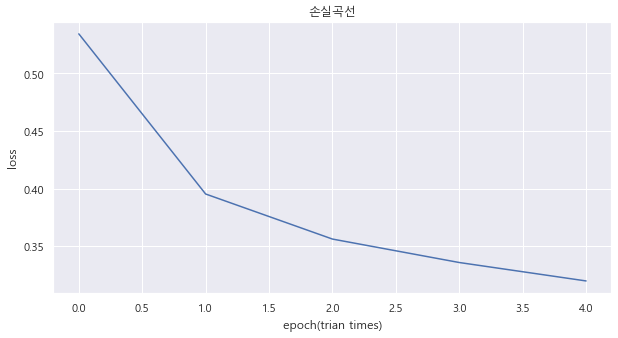

In [34]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.title('손실곡선')
plt.xlabel('epoch(trian times)')
plt.ylabel('loss')
plt.show()

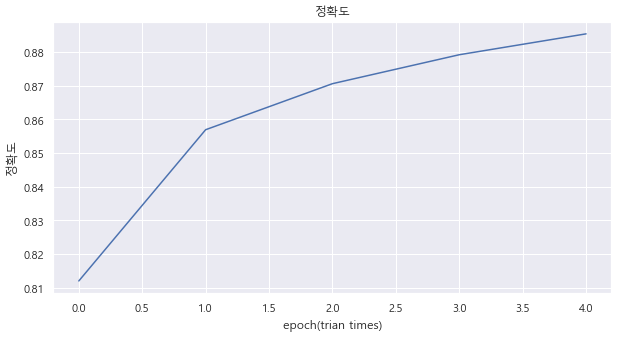

In [37]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.title('정확도')
plt.xlabel('epoch(trian times)')
plt.ylabel('정확도')
plt.show()

#### epoch = 20

In [38]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5200 - accuracy: 0.8156
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3894 - accuracy: 0.8600
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3550 - accuracy: 0.8714
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3330 - accuracy: 0.8812
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3189 - accuracy: 0.8861
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3056 - accuracy: 0.8905
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2981 - accuracy: 0.8951
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2867 - accuracy: 0.8982
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2816 - accuracy: 0.9021
Epoch 10/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.274

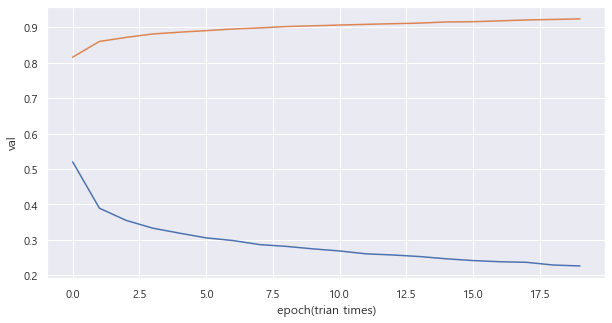

In [39]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
# plt.title('손실곡선')
plt.xlabel('epoch(trian times)')
plt.ylabel('val')
plt.show()

#### 검증손실

훈련세트 훈련 -> 정확도 92%

In [40]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5305 - accuracy: 0.8127 - val_loss: 0.4034 - val_accuracy: 0.8580
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3900 - accuracy: 0.8598 - val_loss: 0.4456 - val_accuracy: 0.8533
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3522 - accuracy: 0.8727 - val_loss: 0.3844 - val_accuracy: 0.8652
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3327 - accuracy: 0.8816 - val_loss: 0.3447 - val_accuracy: 0.8778
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3155 - accuracy: 0.8881 - val_loss: 0.3835 - val_accuracy: 0.8716
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.8906 - val_loss: 0.3782 - val_accuracy: 0.8748
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2971 - accuracy: 0.8947 - val_loss: 0.3781 - val_accuracy:

In [43]:
history.history.keys() # 'loss', 'accuracy' : 트레인 세트 / 'val_loss', 'val_accuracy' : 테스트 세트

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트/검증세트 비교 차트

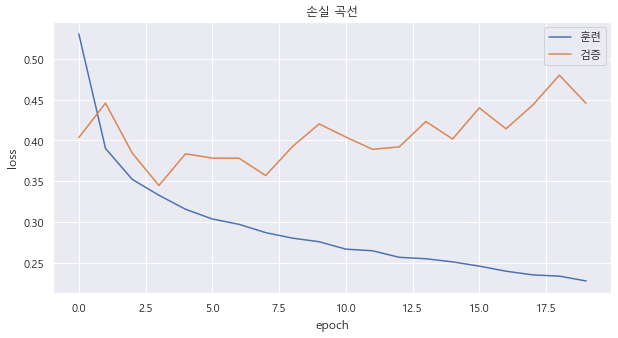

In [44]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실 곡선')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['훈련','검증'])
plt.show()

--> 검증세트에 맞지 않게 훈련 되고 있었다 (과대적합)

#### 드롭아웃 (Drop_out)

In [45]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "ReLU_fashionMNIST_Deep_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5880 - accuracy: 0.7922 - val_loss: 0.4437 - val_accuracy: 0.8391
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4475 - accuracy: 0.8428 - val_loss: 0.4305 - val_accuracy: 0.8443
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4214 - accuracy: 0.8516 - val_loss: 0.3821 - val_accuracy: 0.8662
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4116 - accuracy: 0.8572 - val_loss: 0.3960 - val_accuracy: 0.8655
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4017 - accuracy: 0.8635 - val_loss: 0.3843 - val_accuracy: 0.8702
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3975 - accuracy: 0.8655 - val_loss: 0.3740 - val_accuracy: 0.8735
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3914 - accuracy: 0.8698 - val_loss: 0.3964 - val_accuracy:

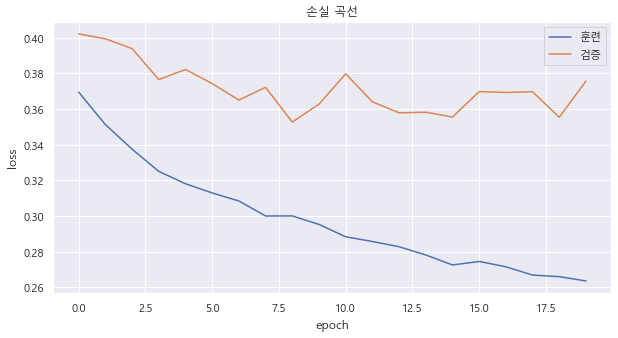

In [49]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실 곡선')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['훈련','검증'])
plt.show()

In [64]:
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')
history = model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2638 - accuracy: 0.8994 - val_loss: 0.3759 - val_accuracy: 0.8861
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2582 - accuracy: 0.9013 - val_loss: 0.3557 - val_accuracy: 0.8892
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2555 - accuracy: 0.8999 - val_loss: 0.3651 - val_accuracy: 0.8886
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2507 - accuracy: 0.9040 - val_loss: 0.3755 - val_accuracy: 0.8865
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2512 - accuracy: 0.9036 - val_loss: 0.3699 - val_accuracy: 0.8855
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2490 - accuracy: 0.9055 - val_loss: 0.3666 - val_accuracy: 0.8881
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2454 - accuracy: 0.9044 - val_loss: 0.3692 - val_accuracy:

In [50]:
new_model = model_fn(keras.layers.Dropout(0.3))

new_model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')
new_history = new_model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5880 - accuracy: 0.7929 - val_loss: 0.4299 - val_accuracy: 0.8486
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4366 - accuracy: 0.8432 - val_loss: 0.3830 - val_accuracy: 0.8617
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3993 - accuracy: 0.8544 - val_loss: 0.3673 - val_accuracy: 0.8673
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3795 - accuracy: 0.8618 - val_loss: 0.3586 - val_accuracy: 0.8672
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3639 - accuracy: 0.8648 - val_loss: 0.3462 - val_accuracy: 0.8732
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3533 - accuracy: 0.8688 - val_loss: 0.3412 - val_accuracy: 0.8747
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3427 - accuracy: 0.8738 - val_loss: 0.3371 - val_accuracy:

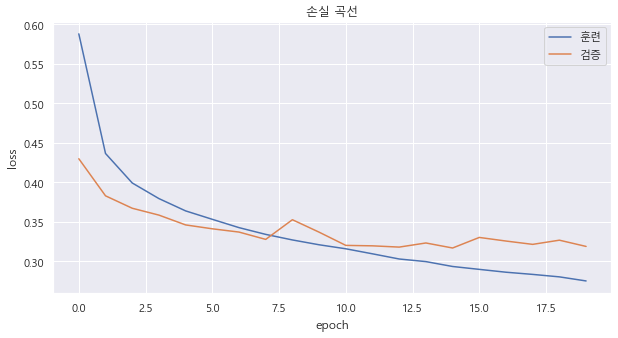

In [51]:
plt.figure(figsize=(10,5))
plt.plot(new_history.history['loss'])
plt.plot(new_history.history['val_loss'])
plt.title('손실 곡선')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['훈련','검증'])
plt.show()

#### 모델 저장/로드

In [66]:
model.summary()

Model: "ReLU_fashionMNIST_Deep_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.save_weights('./data/model-weights.h5')
model.save('./data/model-weights.h5')

##### 가중치 모델 로드

In [60]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model-weights.h5')

In [56]:
model.evaluate(val_scaled,val_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

##### 전체모델 로드

In [70]:
model = keras.models.load_model('./data/model-weights.h5')
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3719 - accuracy: 0.8898


[0.3719494342803955, 0.8898333311080933]

가중치만 저장하면 모델 기능 제약있음. 모델 전체 데이터 저장 하면 모든 기능 수행

In [62]:
model.predict(val_scaled)

375/375 [==============================] - 0s 917us/step


array([[5.7305235e-24, 0.0000000e+00, 3.4631458e-20, ..., 9.5371866e-13,
        1.0000000e+00, 6.4113747e-31],
       [3.0241995e-17, 0.0000000e+00, 1.5038249e-16, ..., 1.9488731e-23,
        1.0000000e+00, 7.1401526e-27],
       [5.5253931e-29, 6.6295786e-35, 0.0000000e+00, ..., 9.9999952e-01,
        1.0340195e-24, 2.8316677e-16],
       ...,
       [2.0048807e-09, 5.6234292e-27, 1.2194385e-12, ..., 1.1013352e-15,
        1.0000000e+00, 4.5904659e-14],
       [1.9621298e-11, 0.0000000e+00, 1.9765749e-12, ..., 3.6648342e-21,
        1.0000000e+00, 4.1032176e-27],
       [3.1537615e-02, 1.1661594e-16, 5.3244969e-12, ..., 3.0181738e-07,
        1.3358921e-08, 9.6808696e-01]], dtype=float32)

In [65]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled),axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 889us/step


0.8898333333333334

#### 콜백 Callback

In [71]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5943 - accuracy: 0.7913 - val_loss: 0.4431 - val_accuracy: 0.8360
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4434 - accuracy: 0.8393 - val_loss: 0.3999 - val_accuracy: 0.8530
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4062 - accuracy: 0.8536 - val_loss: 0.3704 - val_accuracy: 0.8684
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3869 - accuracy: 0.8586 - val_loss: 0.3539 - val_accuracy: 0.8723
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3674 - accuracy: 0.8659 - val_loss: 0.3489 - val_accuracy: 0.8702
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3567 - accuracy: 0.8708 - val_loss: 0.3481 - val_accuracy: 0.8756
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3463 - accuracy: 0.8728 - val_loss: 0.3620 - val_accuracy:

In [72]:
#체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3223 - accuracy: 0.8858


[0.32230785489082336, 0.8858333230018616]

#### 조기종료 (early stop)

In [92]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')

# 베스트 모델을 저장할 콜백
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model2.h5',save_best_only=True,verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1465/1500 [============================>.] - ETA: 0s - loss: 0.5928 - accuracy: 0.7918
Epoch 1: val_loss improved from inf to 0.42668, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5901 - accuracy: 0.7925 - val_loss: 0.4267 - val_accuracy: 0.8431
Epoch 2/20
1476/1500 [============================>.] - ETA: 0s - loss: 0.4400 - accuracy: 0.8404
Epoch 2: val_loss improved from 0.42668 to 0.39561, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4392 - accuracy: 0.8407 - val_loss: 0.3956 - val_accuracy: 0.8551
Epoch 3/20
1495/1500 [============================>.] - ETA: 0s - loss: 0.3998 - accuracy: 0.8541
Epoch 3: val_loss improved from 0.39561 to 0.36876, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3997 - accuracy: 0.8541 - val_loss: 0.3688 - val_accuracy: 0.8638
Epoch 4/20
1477/1500 [===================

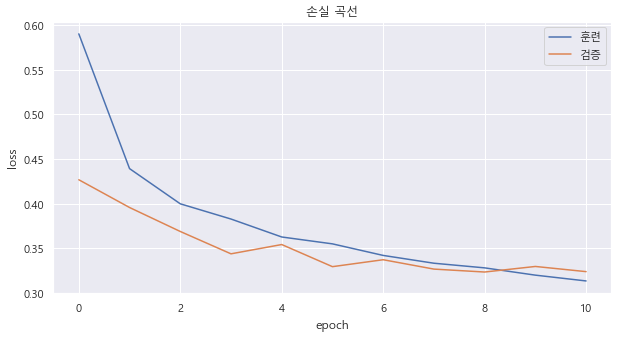

In [93]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('손실 곡선')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['훈련','검증'])
plt.show()

In [97]:
# 어느 epoch에서 조기종료 했는지 확인
early_stopping_cb.stopped_epoch # 드롭아웃

10

In [98]:
model.evaluate(val_scaled,val_target) # 10번째 epoch값

375/375 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8832


[0.3233466148376465, 0.8831666707992554]

In [99]:
# 최종값 저장
model.save('./data/best_model_epoch12.h5')

#### 조기종료된 모델 저장값 / 쳌,포인트로 저장된 모델 저장값 비교

In [100]:
model_cp = keras.models.load_model('./data/best_model2.h5') # earlystopping 콜백된 모델 
model_cp.evaluate(val_scaled, val_target) # 가장 마지막에 epoch한 값이 저장됨

375/375 [==============================] - 1s 1ms/step - loss: 0.3233 - accuracy: 0.8832


[0.3233466148376465, 0.8831666707992554]

In [101]:
model_12 = keras.models.load_model('./data/best_model_epoch12.h5')
model_12.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3233 - accuracy: 0.8832


[0.3233466148376465, 0.8831666707992554]

In [102]:
### 예측결과
val_labels = np.argmax(model.predict(val_scaled),axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 979us/step


0.8831666666666667

In [108]:
val_labels[:10]

array([8, 8, 7, 4, 8, 4, 1, 0, 4, 5], dtype=int64)